In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# importing microglia morphology data
microglia_df = pd.read_csv("C:/Users/marin/OneDrive/Documentos/Prog/dados_microglia.csv", decimal=',')
# removing analysis index  column  
del microglia_df['Índice de Analise']
# modifying columns names
microglia_df.columns = ['Group','Animal','Segments','End-points','Length','N Cells','Density','Span Ratio','Circularity','Area']
microglia_df['Area'] = microglia_df['Area'].astype(float)
microglia_df.head()

,Group,Animal,Segments,End-points,Length,N Cells,Density,Span Ratio,Circularity,Area
0,Jovem,1.1,218.81,346.70,168126.63,27,0.065,1.062,0.864,53184.0
1,Jovem,1.1,291.00,440.71,224866.81,21,0.088,1.266,0.883,31161.0
2,Jovem,1.1,288.58,483.17,262402.17,12,0.051,1.883,0.620,25441.0
3,Jovem,1.1,230.93,386.40,201715.20,15,0.070,1.502,0.811,36636.0
4,Jovem,1.1,140.23,230.77,112471.45,22,0.066,1.571,0.807,29492.0


In [5]:
microglia_df.groupby('Group').mean()

,Segments,End-points,Length,N Cells,Density,Span Ratio,Circularity,Area
Group,,,,,,,,
Idoso,169.9990,273.1240,158638.1820,20.05,0.08040,1.78855,0.74055,22611.50
Idoso + GH,191.7760,310.7340,164592.0245,17.25,0.08715,1.53585,0.80810,24227.05
Jovem,260.1015,422.9825,218741.7725,15.00,0.07160,1.69485,0.74695,28431.90


In [6]:
microglia_df.groupby('Group').std()

,Segments,End-points,Length,N Cells,Density,Span Ratio,Circularity,Area
Group,,,,,,,,
Idoso,30.305680,50.259169,31526.823898,6.589266,0.023039,0.529599,0.085625,9612.235331
Idoso + GH,43.598644,79.649878,35936.947869,5.702031,0.015839,0.320598,0.069556,7280.507758
Jovem,117.450191,194.502187,115408.465496,5.647543,0.015132,0.582387,0.088093,10557.315343


In [11]:
# separating skeleton and fraclac parameters 
skeleton_df = microglia_df[['Group','Segments','End-points','Length']]
fraclac_df = microglia_df[['Group','Density','Span Ratio','Circularity','Area']]
print(fraclac_df.head(2),2*'\n', skeleton_df.head(2))

   Group  Density  Span Ratio  Circularity     Area
0  Jovem    0.065       1.062        0.864  53184.0
1  Jovem    0.088       1.266        0.883  31161.0 

    Group  Segments  End-points     Length
0  Jovem    218.81      346.70  168126.63
1  Jovem    291.00      440.71  224866.81


<AxesSubplot:xlabel='Group', ylabel='N Cells'>

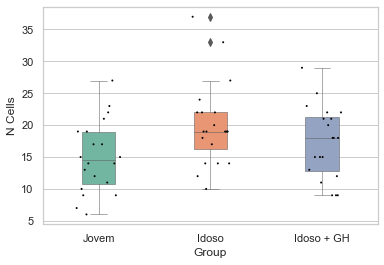

In [12]:
# plot1 -> n cells x groups
sns.set_theme(style = 'whitegrid')
sns.boxplot(x=microglia_df['Group'],y=microglia_df['N Cells'],palette='Set2', width=0.3,linewidth=0.5)
sns.stripplot(x=microglia_df['Group'], y=microglia_df['N Cells'],color='black', jitter=0.2, size=2)

<AxesSubplot:xlabel='Group', ylabel='Length'>

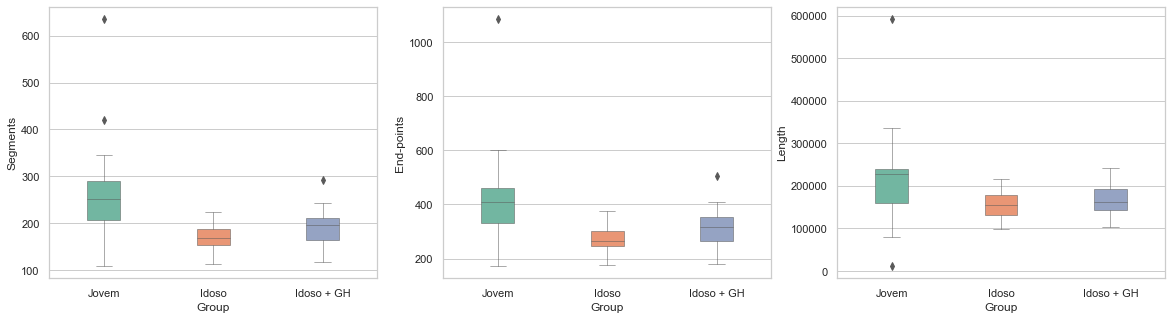

In [14]:
# plot n2 -> skeleton parameters x group 
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.boxplot(data=skeleton_df, y='Segments', x='Group', ax=axs[0],palette='Set2', width=0.3,linewidth=0.5)
sns.boxplot(data=skeleton_df, y='End-points', x='Group',ax=axs[1],palette='Set2', width=0.3,linewidth=0.5)
sns.boxplot(data=skeleton_df, y='Length', x='Group', ax=axs[2],palette='Set2', width=0.3,linewidth=0.5)

<AxesSubplot:xlabel='Group', ylabel='Area'>

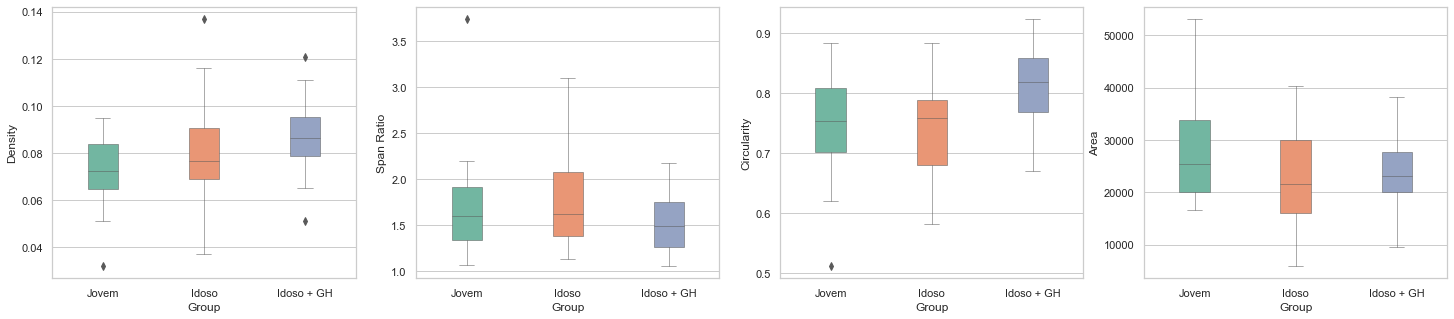

In [15]:
# plot n3 -> fraclac parameters x group 
fig, axs = plt.subplots(ncols=4, figsize=(25,5))
sns.boxplot(data=fraclac_df, y='Density', x='Group', ax=axs[0],palette='Set2', width=0.3,linewidth=0.5)
sns.boxplot(data=fraclac_df, y='Span Ratio', x='Group',ax=axs[1],palette='Set2', width=0.3,linewidth=0.5)
sns.boxplot(data=fraclac_df, y='Circularity', x='Group', ax=axs[2],palette='Set2', width=0.3,linewidth=0.5)
sns.boxplot(data=fraclac_df, y='Area', x='Group', ax=axs[3],palette='Set2', width=0.3,linewidth=0.5)

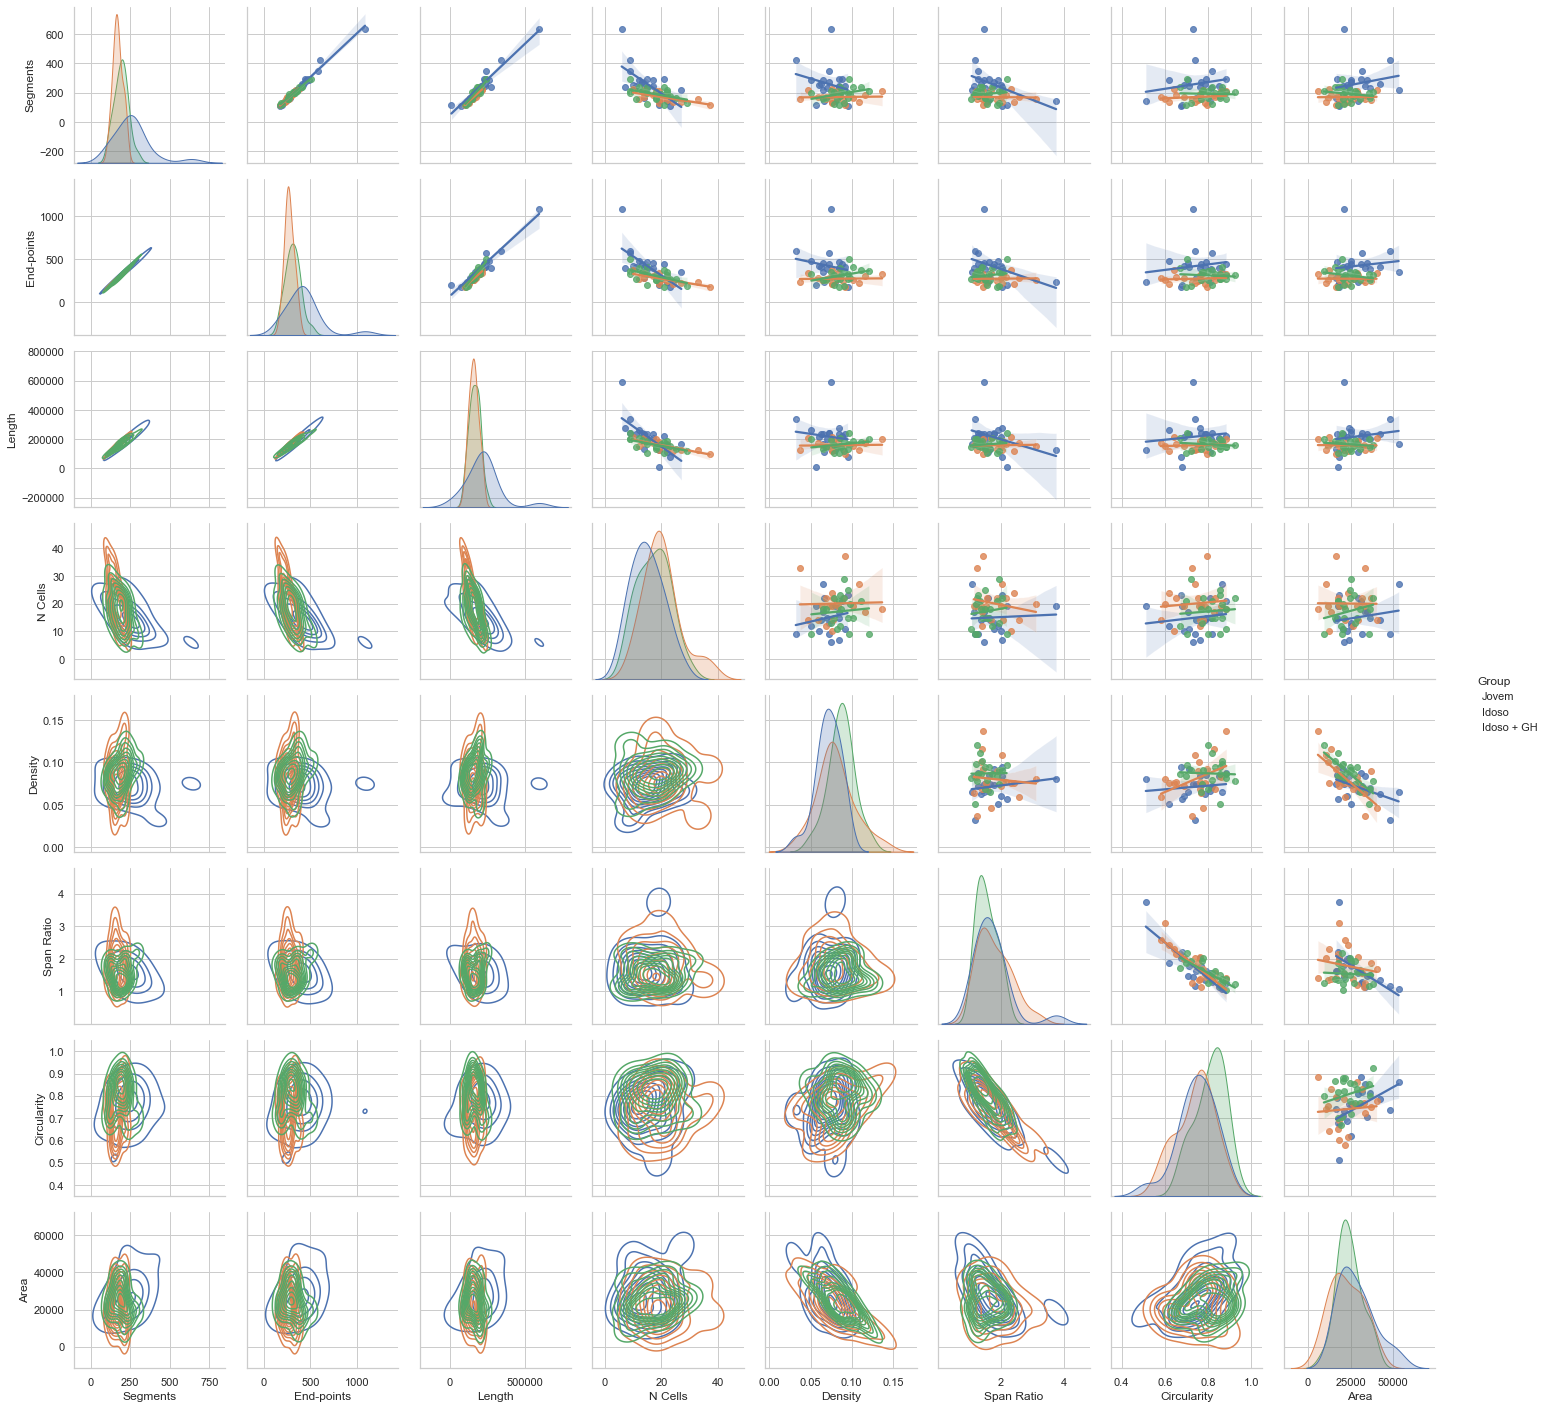

In [16]:
# Plot n -> paramters x parameters 
g=sns.PairGrid(microglia_df,diag_sharey= False, hue='Group').add_legend()
g.map_lower(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot,lw=1,fill=True)

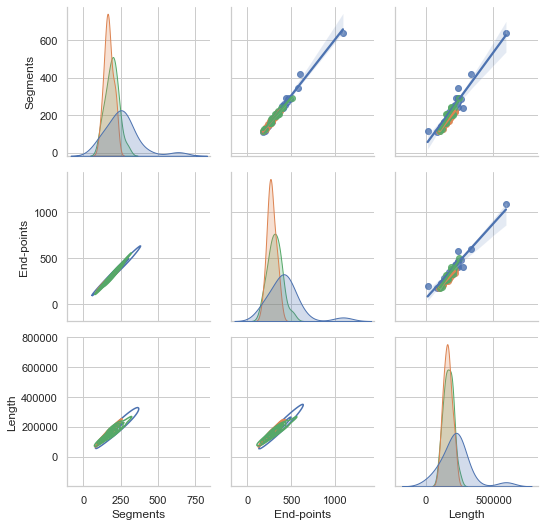

In [19]:
# Plot n -> paramters x parameters from skeleton 
gskeleton=sns.PairGrid(skeleton_df,diag_sharey= False, hue='Group')
gskeleton.map_lower(sns.kdeplot)
gskeleton.map_upper(sns.regplot)
gskeleton.map_diag(sns.kdeplot,lw=1,fill=True)

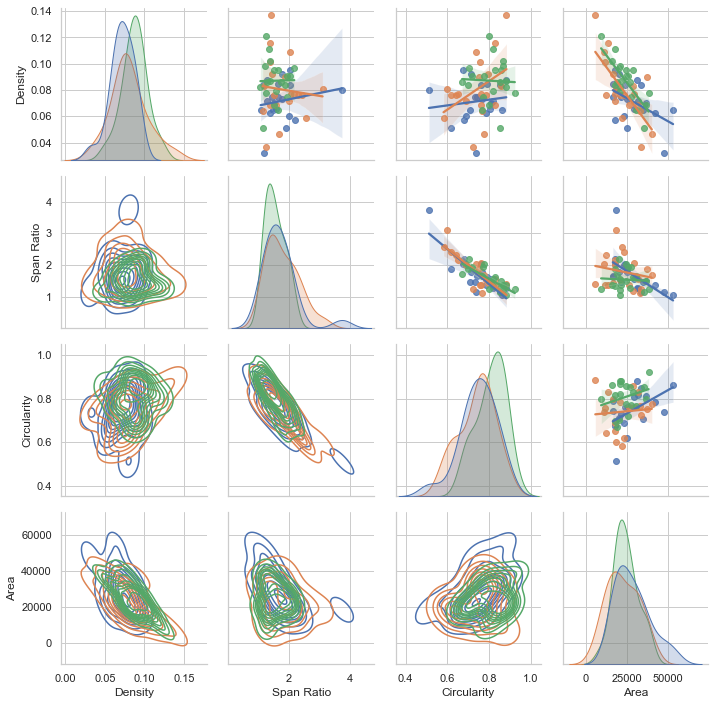

In [20]:
# Plot n -> paramters x parameters from FracLac
gfraclac=sns.PairGrid(fraclac_df,diag_sharey= False, hue='Group')
gfraclac.map_lower(sns.kdeplot)
gfraclac.map_upper(sns.regplot)
gfraclac.map_diag(sns.kdeplot,lw=1,fill=True)

<AxesSubplot:>

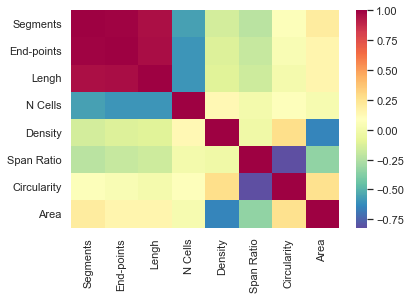

In [10]:
# creating correlation df and ploting it 
corr_df = microglia_df.drop(['Group','Animal',], axis=1).corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='Spectral_r')

(0.0, 700.0)

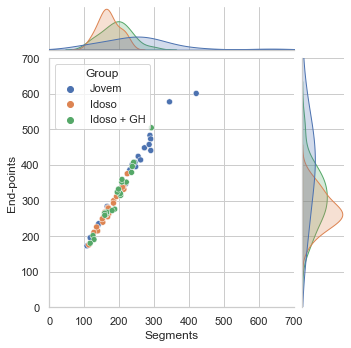

In [17]:
# From the heatmap, creating a plot correlating the 2 parapeters with the strongest correlation 
plot = sns.jointplot(data=skeleton_df ,x="Segments", y="End-points",height=5, hue='Group')
plot.ax_marg_x.set_xlim(0, 700)
plot.ax_marg_y.set_ylim(0, 700)

In [18]:
# starting modeling 
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [22]:
# testing modeling 
train, test = train_test_split(microglia_df, test_size = 0.33, stratify = microglia_df['Group'], random_state = 42)
# sns.pairplot(train, hue='Group', height = 2, palette = 'colorblind')
# creating models variables 
pd.Categorical(microglia_df.Group)
X_train = train[['Segments','End-points','Lengh','Density','Circularity','Area']]
y_train = train.Group
X_test = test[['Segments','End-points','Lengh','Density','Circularity','Area']]
y_test = test.Group

In [74]:
# creating the decision Tree 
dectree = DecisionTreeClassifier(max_depth = 4, random_state = 1)
dectree.fit(X_train,y_train)
pred=dectree.predict(X_test)
print('DecTree Acc',"{:.3f}".format(metrics.accuracy_score(pred,y_test)))
# Decision tree accuracy is 0.35, which is kind of low and not ideal.

DecTree Acc 0.350


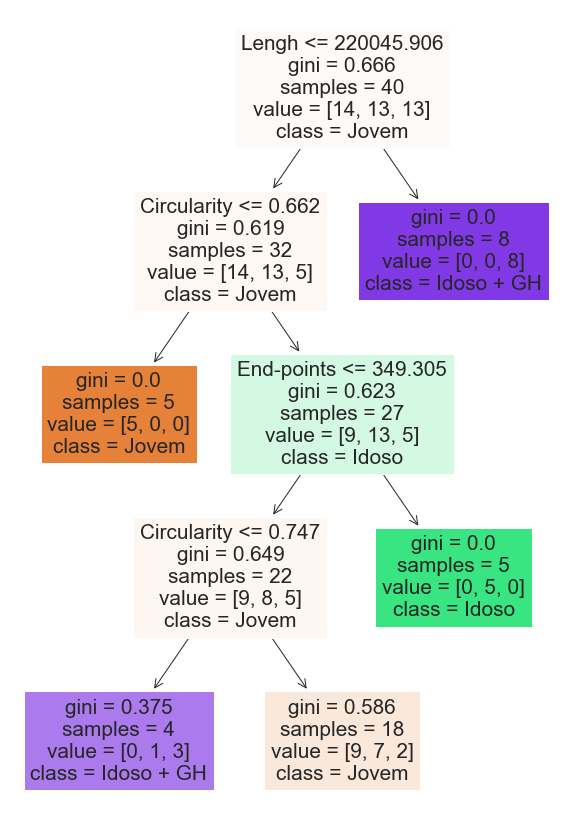

In [75]:
# plot n7 -> ilustrating the decision tree
features = ['Segments','End-points','Lengh','Density','Circularity','Area']
classes = ['Jovem', 'Idoso', 'Idoso + GH']
plt.figure(figsize = (10,15))
plot_tree(dectree, feature_names=features, class_names=classes, filled = True)
plt.show()

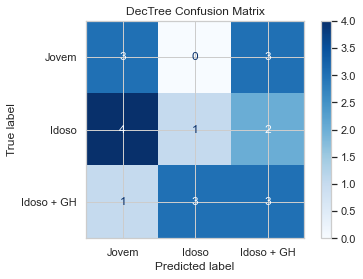

In [76]:
# add plot n8-> confusion matrix, expliciting decision errors 
disp = metrics.plot_confusion_matrix(dectree, X_test, y_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title('DecTree Confusion Matrix');
# the decision tree displays lots of errors, expecially in the group 'Idoso'

In summary, based upon the given parameters there is no accuracy to predict the experimental group which each cell belong. Therefore, in order to further develop this modeling, a new analysis must be done with new parameters  that describe a stronger correlation.